In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv")
dataset.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
dataset.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [4]:
binary_cols = ["Stage_fear","Drained_after_socializing"]
for col in binary_cols:
    dataset[col] = dataset[col].replace({"Yes":1,"No":0}).astype(int)

dataset["Personality"] = dataset["Personality"].replace({"Extrovert" : 1,"Introvert" : 0}).astype(int)

/tmp/ipykernel_13/1061327800.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[col] = dataset[col].replace({"Yes":1,"No":0}).astype(int)
/tmp/ipykernel_13/1061327800.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[col] = dataset[col].replace({"Yes":1,"No":0}).astype(int)
/tmp/ipykernel_13/1061327800.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [5]:
dataset.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [6]:
from sklearn.model_selection import train_test_split

x = dataset.drop(columns = ["Personality"])
y = dataset["Personality"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

model = RandomForestClassifier(n_estimators = 100,random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       262
           1       0.94      0.89      0.91       318

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580

[[244  18]
 [ 35 283]]


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrics')

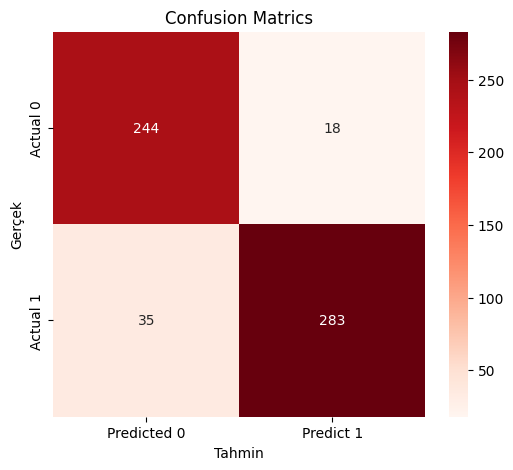

In [9]:
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds",xticklabels = ["Predicted 0","Predict 1"], yticklabels = ["Actual 0","Actual 1"])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrics")


In [10]:
import xgboost as xgb

xgb = xgb.XGBClassifier(use_label_encoder = False,eval_metric = "logloss")
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))
print(cm_xgb)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       262
           1       0.95      0.87      0.91       318

    accuracy                           0.90       580
   macro avg       0.90      0.91      0.90       580
weighted avg       0.91      0.90      0.90       580

[[247  15]
 [ 41 277]]


In [11]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [50, 100, 200],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=0)
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring="accuracy",
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("En iyi model: ", grid_search.best_params_)
print("En iyi doğruluk: ", grid_search.best_score_)



Fitting 3 folds for each of 108 candidates, totalling 324 fits
En iyi model:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
En iyi doğruluk:  0.9387895522105336


In [12]:
from sklearn.metrics import confusion_matrix,classification_report

best_xgb = grid_search.best_estimator_  # Model objesi
y_pred_best = best_xgb.predict(x_test)
print(classification_report(y_pred_best,y_test))
cm_xgb_best = confusion_matrix(y_pred,y_test)
print(cm_xgb_best)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       280
           1       0.90      0.95      0.92       300

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

[[244  35]
 [ 18 283]]


Text(0.5, 1.0, 'Confusion Matrics')

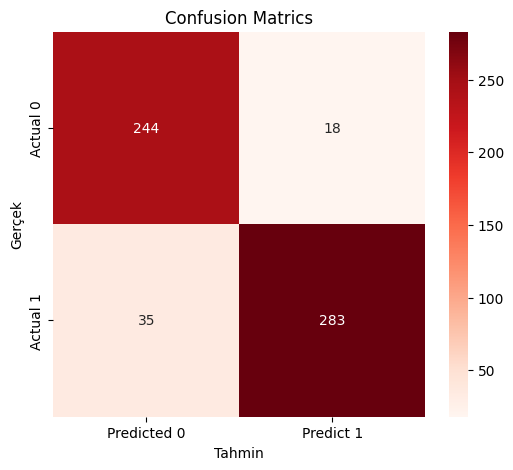

In [13]:
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds",xticklabels = ["Predicted 0","Predict 1"], yticklabels = ["Actual 0","Actual 1"])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrics")